# **Libraries**
---

In [1]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm as tq
import gzip, pickle
from sklearn.model_selection import train_test_split



# **Load files**  ▓▓▓▓▓▓▓▓░░░░░░░░░░░░  100%
---



# **25M data file**

In [2]:
df_25M = pd.read_csv("ratings.csv").drop(columns='timestamp').to_numpy()
movies_df_25M = pd.read_csv("movies.csv").to_numpy()

In [3]:
movies_df_25M

# **100K Df**

In [4]:
#100k data file
path = "/home/oepeng/Documents/Python/my jupter/100k_csv/"
ratings_df = pd.read_csv( path + "ratings.csv").drop(columns='timestamp').to_numpy()
movies_df = pd.read_csv( path + "movies.csv").to_numpy()

dummy_user = {
    'userId' : 999, #my phone no.
    'movieId': 2640,  # superman
    'rating': 5 
}


In [5]:
from datastructures import Sparser 
sparse = Sparser(ratings_df, movies_df)

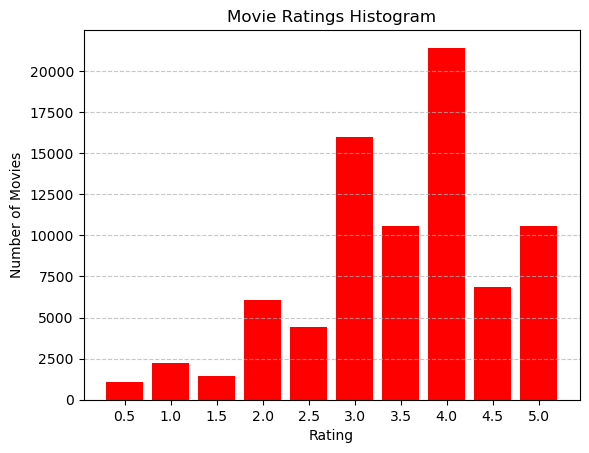

In [6]:
sparse.plot_ratings()

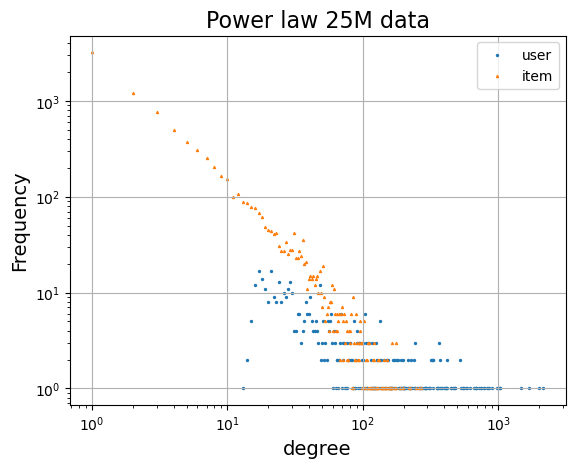

In [7]:
sparse.plot_scatter()


# ```create sparse matrices```


In [9]:
# data files
train_test_data = sparse.data_by_user_train, sparse.data_by_movie_train, sparse.data_by_user_test
features_data = sparse.movie_to_system_mov_title_dict, sparse.item_to_features, sparse.features_to_item 

In [12]:
 #pickle and load
sparse_data = {'features_data':features_data , 'train_test_data': train_test_data}

with open( "25M_data_normal.pkl", "wb") as f:
    pickle.dump(sparse_data , f)



In [13]:
# load
with open("25M_data_normal.pkl", "rb") as f:
    loaded_sparse_data = pickle.load(f)


In [14]:
features_data = loaded_sparse_data["features_data"]
train_test_data = loaded_sparse_data["train_test_data"]
movie_to_system_mov_title_dict = features_data[0]

  5%|▌         | 1/20 [00:00<00:18,  1.02it/s]

epoch: 1   rmse train: 0.8606140397633316  | rmse test: 0.911047930813852


 10%|█         | 2/20 [00:01<00:17,  1.05it/s]

epoch: 2   rmse train: 0.8284561937400698  | rmse test: 0.9162773624804886


 15%|█▌        | 3/20 [00:02<00:16,  1.05it/s]

epoch: 3   rmse train: 0.7772184165631709  | rmse test: 0.9293093439666281


 20%|██        | 4/20 [00:03<00:15,  1.05it/s]

epoch: 4   rmse train: 0.7606779496364562  | rmse test: 0.9338548020345071


 25%|██▌       | 5/20 [00:04<00:14,  1.06it/s]

epoch: 5   rmse train: 0.7541028426485151  | rmse test: 0.9348516525539444


 30%|███       | 6/20 [00:05<00:13,  1.06it/s]

epoch: 6   rmse train: 0.7510827940734988  | rmse test: 0.9349722640751229


 35%|███▌      | 7/20 [00:06<00:12,  1.06it/s]

epoch: 7   rmse train: 0.7494650266691156  | rmse test: 0.9348637466975792


 40%|████      | 8/20 [00:07<00:11,  1.06it/s]

epoch: 8   rmse train: 0.7484536341589069  | rmse test: 0.9346606889446178


 45%|████▌     | 9/20 [00:08<00:10,  1.06it/s]

epoch: 9   rmse train: 0.7477315514550323  | rmse test: 0.9344284017801405


 50%|█████     | 10/20 [00:09<00:09,  1.05it/s]

epoch: 10   rmse train: 0.7471709062210958  | rmse test: 0.9342067330955561


 55%|█████▌    | 11/20 [00:10<00:08,  1.06it/s]

epoch: 11   rmse train: 0.7467198862687351  | rmse test: 0.9340168082132697


 60%|██████    | 12/20 [00:11<00:07,  1.06it/s]

epoch: 12   rmse train: 0.746354336899503  | rmse test: 0.933867686349315


 65%|██████▌   | 13/20 [00:12<00:06,  1.06it/s]

epoch: 13   rmse train: 0.7460597656686898  | rmse test: 0.9337604963556576


 70%|███████   | 14/20 [00:13<00:05,  1.06it/s]

epoch: 14   rmse train: 0.7458254507458582  | rmse test: 0.933691518584281


 75%|███████▌  | 15/20 [00:14<00:04,  1.06it/s]

epoch: 15   rmse train: 0.7456418171631838  | rmse test: 0.9336549828748453


 80%|████████  | 16/20 [00:15<00:03,  1.06it/s]

epoch: 16   rmse train: 0.7454993058302428  | rmse test: 0.9336449822724963


 85%|████████▌ | 17/20 [00:16<00:02,  1.06it/s]

epoch: 17   rmse train: 0.7453886147789069  | rmse test: 0.9336563169198664


 90%|█████████ | 18/20 [00:16<00:01,  1.06it/s]

epoch: 18   rmse train: 0.7453015221658787  | rmse test: 0.9336846396829479


 95%|█████████▌| 19/20 [00:17<00:00,  1.07it/s]

epoch: 19   rmse train: 0.7452314653563362  | rmse test: 0.9337263194449557


100%|██████████| 20/20 [00:18<00:00,  1.06it/s]

epoch: 20   rmse train: 0.7451736228514394  | rmse test: 0.9337782726043494


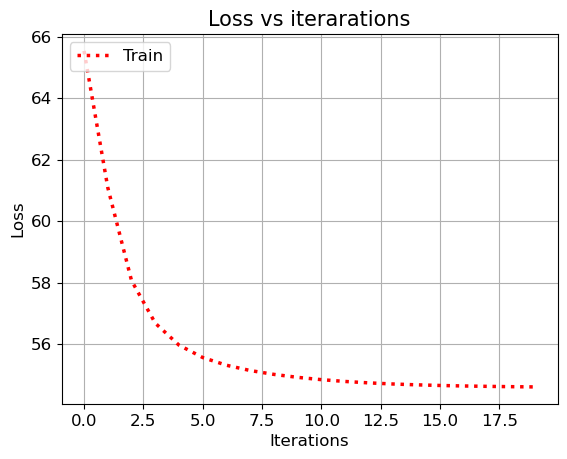

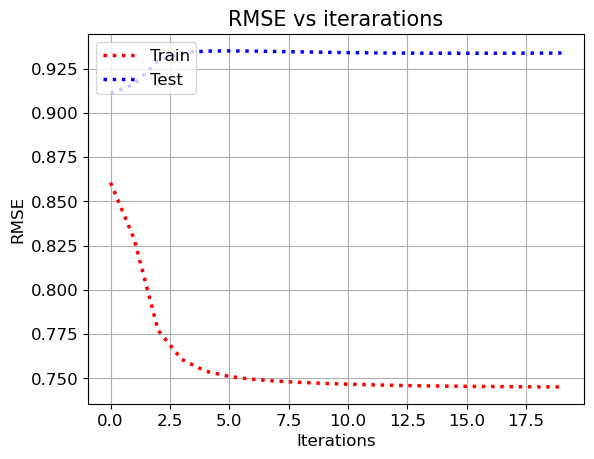

In [27]:
# trains the model

from model import Trainor
trainor = Trainor(data = train_test_data, latent_d=6, gamma=0.01)
trainor.train() 

In [ ]:
 #pickle and load
data_trained_data = trainor.user_matrix , trainor.item_matrix ,trainor.user_bias ,trainor.item_bias 
with open( "25M_data_trained_data.pkl", "wb") as f:
    pickle.dump(data_trained_data , f)



In [ ]:
# load
with open("25M_data_trained_data.pkl", "rb") as f:
    loaded_data_trained_data = pickle.load(f)

# ```evalute performance of model```

In [ ]:

def train_and_plot_rmse_vs_latent_d(data, max_latent_d=20, show_plot=True):
    rmse_train_list = []
    rmse_test_list = []
    latent_d_values = [] 
    percentage_diff = [] # x-axis values
    
    for latent_d in range(1 , max_latent_d + 1):
        if latent_d <= 10 or latent_d % 2 == 0:
            print("Training with latent_d =", latent_d )
            model = Trainor(data, latent_d=latent_d)
            model.train(epoch=10, showplt = False)
            r = model.rmse[-1]  # Get the last RMSE from the training
            rt = model.rmse_test[-1]
            var =  100*(rt - r)/r
            percentage_diff.append(var)
            rmse_train_list.append(r) 
            rmse_test_list.append(rt)  
            latent_d_values.append(latent_d)  
    
    # Plots 
    plt.figure(figsize=(10, 6))
    plt.plot(latent_d_values, rmse_train_list, label='RMSE Train', marker='o')
    plt.plot(latent_d_values, rmse_test_list, label='RMSE Test', marker='o')
    plt.xlabel('Latent Dimensions k ')
    plt.ylabel('RMSE')
    plt.title('RMSEs vs. Latent Dimension')
    plt.legend()
    plt.grid()
    
  
    plt.savefig('rmse_vs_latent_d.svg')
    plt.show()
    
    plt.plot(latent_d_values, percentage_diff, marker='o')
    plt.xlabel('Latent Dimensions k ')
    plt.ylabel('difference in RMSE')
    plt.title('varince of RMSEs vs. Latent Dimension')
    plt.grid()
    plt.savefig('latent dimesions k.svg')
    plt.show()


train_and_plot_rmse_vs_latent_d(train_test_data,max_latent_d=20, show_plot=False)  



In [30]:
trainor.predictor(features_data[0], train_test_data[0] , 1)

AI recommnds:........ 
	 1 Logan Lucky (2017)
	 2 Byzantium (2012)
	 3 Safe Haven (2013)
	 4 Fail-Safe (1964)
	 5 Tremors 4: The Legend Begins (2004)
	 6 Domestic Disturbance (2001)
	 7 Lions For Lambs (2007)
	 8 John Mulaney: New In Town (2012)
	 9 You Again (2010)
	 10 Dead Fury (2008)
